In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv("/home/boss/Documents/diabetes_prediction_dataset.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
ds.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Spliting independent features and dependent feature
X=ds.iloc[:,:-1]
Y=ds.iloc[:,-1]

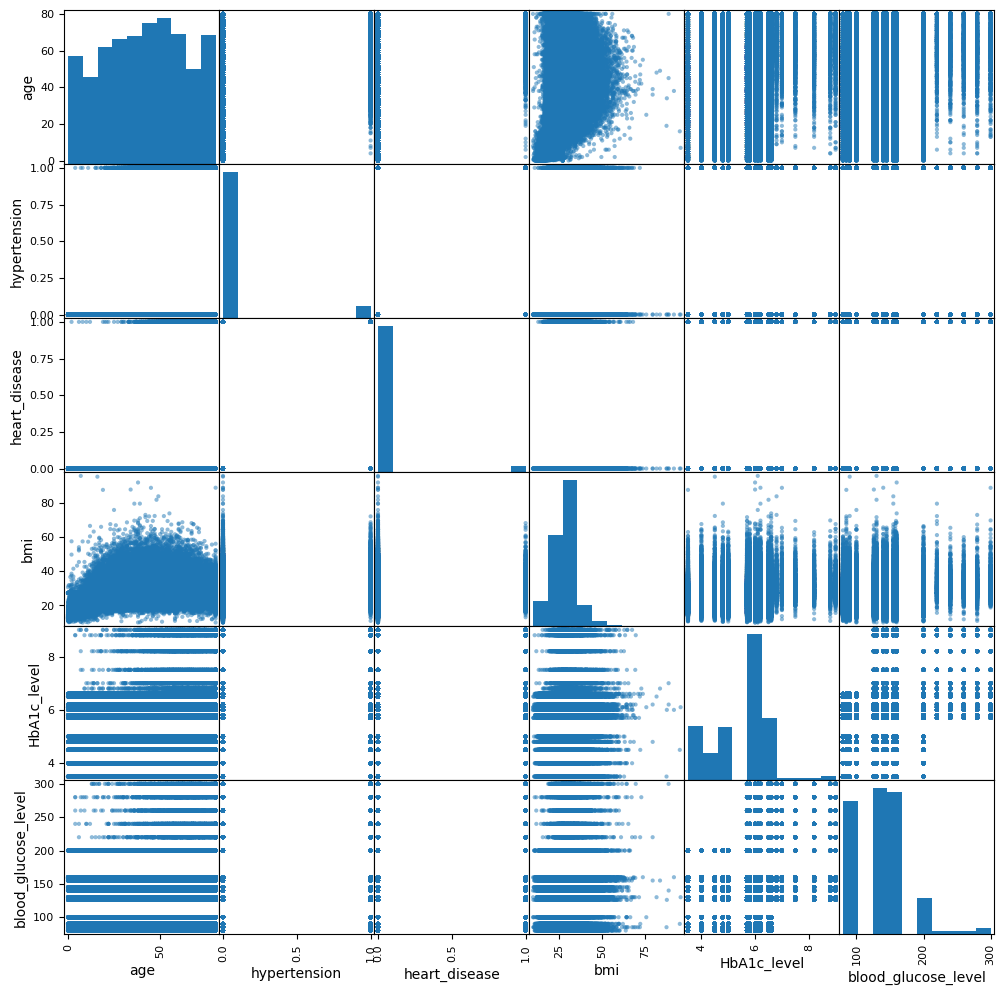

In [3]:
features=X.columns.tolist()
pd.plotting.scatter_matrix(X[features], figsize=(12, 12))
plt.show()

In [4]:
correlation_matrix = X.corr()
# Display the correlation matrix
print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   

                     HbA1c_level  blood_glucose_level  
age                     0.101354             0.110672  
hypertension            0.080939             0.084429  
heart_disease           0.067589             0.070066  
bmi                     0.082997             0.091261  
HbA1c_level             1.000000             0.166733  
blood_glucose_level     0.166733             1.000000  


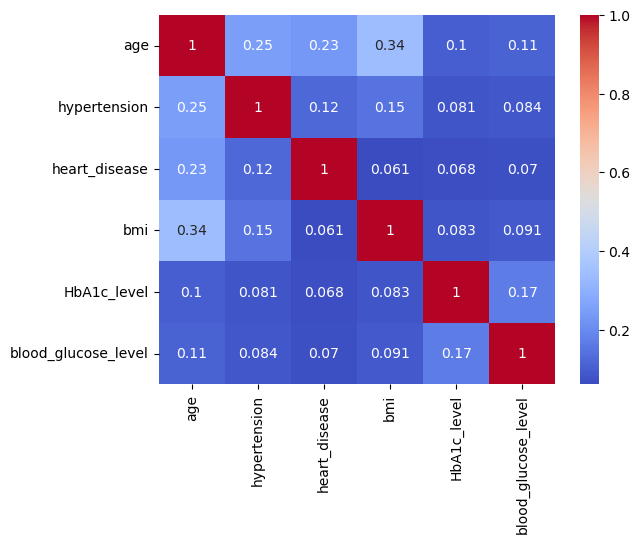

In [5]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,4])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

X[0,:]

array([  1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
         0.  ,  80.  ,   0.  ,   1.  ,  25.19,   6.6 , 140.  ])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=41)

In [8]:
X_train.shape

(80000, 15)

In [9]:
# X_test.shape
Y_test.value_counts()

0    18293
1     1707
Name: diabetes, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,9:]=sc.fit_transform(X_train[:,9:])
X_test[:,9:]=sc.transform(X_test[:,9:])



In [11]:
X_train[0,:].shape

(15,)

In [12]:
import tensorflow as tf
import tensorflow.keras.losses as ls


In [13]:
model=tf.keras.models.Sequential(
[tf.keras.layers.Dense(20,activation='relu',input_shape=(15,))
,tf.keras.layers.Dense(25,activation='relu'),
 tf.keras.layers.Dense(30,activation='relu'),
tf.keras.layers.Dense(25,activation='relu'),
 tf.keras.layers.Dense(20,activation='relu'),
 tf.keras.layers.Dense(1,activation='sigmoid')
 ])

2023-07-14 18:15:16.585625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 18:15:16.586240: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 25)                525       
                                                                 
 dense_2 (Dense)             (None, 30)                780       
                                                                 
 dense_3 (Dense)             (None, 25)                775       
                                                                 
 dense_4 (Dense)             (None, 20)                520       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,941
Trainable params: 2,941
Non-trainabl

In [15]:
learning_rate = 0.001  # Set the desired learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss=ls.BinaryCrossentropy(),metrics=['accuracy'])
X_train.shape

(80000, 15)

In [16]:
model.fit(X_train,Y_train,batch_size=5000,validation_split=0.25,epochs=500)

Epoch 1/500
12/12 [==============================] - 3s 144ms/step - loss: 0.6327 - accuracy: 0.8520 - val_loss: 0.5629 - val_accuracy: 0.9163
Epoch 2/500
12/12 [==============================] - 1s 102ms/step - loss: 0.5025 - accuracy: 0.9147 - val_loss: 0.4312 - val_accuracy: 0.9163
Epoch 3/500
12/12 [==============================] - 1s 98ms/step - loss: 0.3795 - accuracy: 0.9147 - val_loss: 0.3272 - val_accuracy: 0.9163
Epoch 4/500
12/12 [==============================] - 1s 109ms/step - loss: 0.3031 - accuracy: 0.9147 - val_loss: 0.2709 - val_accuracy: 0.9163
Epoch 5/500
12/12 [==============================] - 1s 94ms/step - loss: 0.2486 - accuracy: 0.9147 - val_loss: 0.2187 - val_accuracy: 0.9163
Epoch 6/500
12/12 [==============================] - 1s 108ms/step - loss: 0.1999 - accuracy: 0.9155 - val_loss: 0.1763 - val_accuracy: 0.9226
Epoch 7/500
12/12 [==============================] - 1s 108ms/step - loss: 0.1635 - accuracy: 0.9341 - val_loss: 0.1487 - val_accuracy: 0.9467
E

Epoch 58/500
12/12 [==============================] - 1s 125ms/step - loss: 0.0854 - accuracy: 0.9704 - val_loss: 0.0857 - val_accuracy: 0.9697
Epoch 59/500
12/12 [==============================] - 2s 129ms/step - loss: 0.0851 - accuracy: 0.9709 - val_loss: 0.0848 - val_accuracy: 0.9700
Epoch 60/500
12/12 [==============================] - 1s 128ms/step - loss: 0.0846 - accuracy: 0.9711 - val_loss: 0.0847 - val_accuracy: 0.9696
Epoch 61/500
12/12 [==============================] - 1s 120ms/step - loss: 0.0847 - accuracy: 0.9709 - val_loss: 0.0848 - val_accuracy: 0.9701
Epoch 62/500
12/12 [==============================] - 1s 125ms/step - loss: 0.0845 - accuracy: 0.9711 - val_loss: 0.0844 - val_accuracy: 0.9703
Epoch 63/500
12/12 [==============================] - 2s 134ms/step - loss: 0.0844 - accuracy: 0.9712 - val_loss: 0.0842 - val_accuracy: 0.9700
Epoch 64/500
12/12 [==============================] - 1s 115ms/step - loss: 0.0842 - accuracy: 0.9711 - val_loss: 0.0845 - val_accuracy:

Epoch 115/500
12/12 [==============================] - 1s 113ms/step - loss: 0.0813 - accuracy: 0.9719 - val_loss: 0.0829 - val_accuracy: 0.9712
Epoch 116/500
12/12 [==============================] - 1s 94ms/step - loss: 0.0815 - accuracy: 0.9717 - val_loss: 0.0832 - val_accuracy: 0.9710
Epoch 117/500
12/12 [==============================] - 1s 116ms/step - loss: 0.0816 - accuracy: 0.9718 - val_loss: 0.0830 - val_accuracy: 0.9710
Epoch 118/500
12/12 [==============================] - 2s 132ms/step - loss: 0.0818 - accuracy: 0.9718 - val_loss: 0.0829 - val_accuracy: 0.9710
Epoch 119/500
12/12 [==============================] - 1s 116ms/step - loss: 0.0814 - accuracy: 0.9717 - val_loss: 0.0838 - val_accuracy: 0.9696
Epoch 120/500
12/12 [==============================] - 1s 113ms/step - loss: 0.0820 - accuracy: 0.9717 - val_loss: 0.0828 - val_accuracy: 0.9708
Epoch 121/500
12/12 [==============================] - 1s 104ms/step - loss: 0.0813 - accuracy: 0.9719 - val_loss: 0.0827 - val_acc

12/12 [==============================] - 2s 149ms/step - loss: 0.0792 - accuracy: 0.9727 - val_loss: 0.0840 - val_accuracy: 0.9707
Epoch 228/500
12/12 [==============================] - 1s 122ms/step - loss: 0.0792 - accuracy: 0.9726 - val_loss: 0.0838 - val_accuracy: 0.9708
Epoch 229/500
12/12 [==============================] - 1s 125ms/step - loss: 0.0792 - accuracy: 0.9727 - val_loss: 0.0839 - val_accuracy: 0.9705
Epoch 230/500
12/12 [==============================] - 2s 143ms/step - loss: 0.0793 - accuracy: 0.9725 - val_loss: 0.0839 - val_accuracy: 0.9706
Epoch 231/500
12/12 [==============================] - 2s 128ms/step - loss: 0.0791 - accuracy: 0.9727 - val_loss: 0.0846 - val_accuracy: 0.9712
Epoch 232/500
12/12 [==============================] - 1s 124ms/step - loss: 0.0792 - accuracy: 0.9727 - val_loss: 0.0841 - val_accuracy: 0.9702
Epoch 233/500
12/12 [==============================] - 1s 109ms/step - loss: 0.0790 - accuracy: 0.9727 - val_loss: 0.0840 - val_accuracy: 0.9706

12/12 [==============================] - 1s 116ms/step - loss: 0.0781 - accuracy: 0.9730 - val_loss: 0.0854 - val_accuracy: 0.9704
Epoch 340/500
12/12 [==============================] - 1s 122ms/step - loss: 0.0778 - accuracy: 0.9728 - val_loss: 0.0857 - val_accuracy: 0.9710
Epoch 341/500
12/12 [==============================] - 2s 141ms/step - loss: 0.0782 - accuracy: 0.9727 - val_loss: 0.0856 - val_accuracy: 0.9708
Epoch 342/500
12/12 [==============================] - 1s 108ms/step - loss: 0.0778 - accuracy: 0.9731 - val_loss: 0.0868 - val_accuracy: 0.9691
Epoch 343/500
12/12 [==============================] - 1s 116ms/step - loss: 0.0779 - accuracy: 0.9730 - val_loss: 0.0854 - val_accuracy: 0.9709
Epoch 344/500
12/12 [==============================] - 1s 111ms/step - loss: 0.0777 - accuracy: 0.9732 - val_loss: 0.0856 - val_accuracy: 0.9704
Epoch 345/500
12/12 [==============================] - 1s 112ms/step - loss: 0.0775 - accuracy: 0.9733 - val_loss: 0.0855 - val_accuracy: 0.9707

12/12 [==============================] - 1s 118ms/step - loss: 0.0766 - accuracy: 0.9736 - val_loss: 0.0871 - val_accuracy: 0.9702
Epoch 452/500
12/12 [==============================] - 2s 127ms/step - loss: 0.0767 - accuracy: 0.9736 - val_loss: 0.0866 - val_accuracy: 0.9704
Epoch 453/500
12/12 [==============================] - 1s 105ms/step - loss: 0.0768 - accuracy: 0.9734 - val_loss: 0.0872 - val_accuracy: 0.9696
Epoch 454/500
12/12 [==============================] - 1s 124ms/step - loss: 0.0768 - accuracy: 0.9733 - val_loss: 0.0875 - val_accuracy: 0.9703
Epoch 455/500
12/12 [==============================] - 2s 140ms/step - loss: 0.0766 - accuracy: 0.9734 - val_loss: 0.0869 - val_accuracy: 0.9704
Epoch 456/500
12/12 [==============================] - 1s 109ms/step - loss: 0.0765 - accuracy: 0.9736 - val_loss: 0.0870 - val_accuracy: 0.9711
Epoch 457/500
12/12 [==============================] - 1s 120ms/step - loss: 0.0765 - accuracy: 0.9737 - val_loss: 0.0885 - val_accuracy: 0.9687

In [17]:

res=model.predict(X_test)

625/625 [==============================] - 3s 5ms/step


In [18]:

res=np.where(res>=0.5,1,0)

In [19]:

correct_predictions = sum(p == t for p, t in zip(res, Y_test))

# Calculate the total number of predictions
total_predictions = Y_test.shape[0]

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print("Correct Predictions:", correct_predictions)
print("Total Predictions:", total_predictions)
print("Accuracy:", accuracy)


Correct Predictions: [19405]
Total Predictions: 20000
Accuracy: [0.97025]
